<h1> Project #3 |  Dengue Analysis</h1>
<hr>
<h3> Data Analysists :  Quert Russel Lalisan | BSIT 3B </h3>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dataset/dengue.csv')

In [3]:
dengue['Mortality_Rate'] = np.round((dengue['Dengue_Deaths']/dengue['Dengue_Cases'])* 100, 2)
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           1020 non-null   object 
 1   Year            1020 non-null   int64  
 2   Region          1020 non-null   object 
 3   Dengue_Cases    1020 non-null   int64  
 4   Dengue_Deaths   1020 non-null   int64  
 5   Mortality_Rate  1020 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.9+ KB


<img src='https://newsinfo.inquirer.net/files/2022/06/DOH-Dengue.png'>

<h1> Question 1) How many Cases are there in each Region by year 2018 - 2020</h1>

<Figure size 1500x800 with 0 Axes>

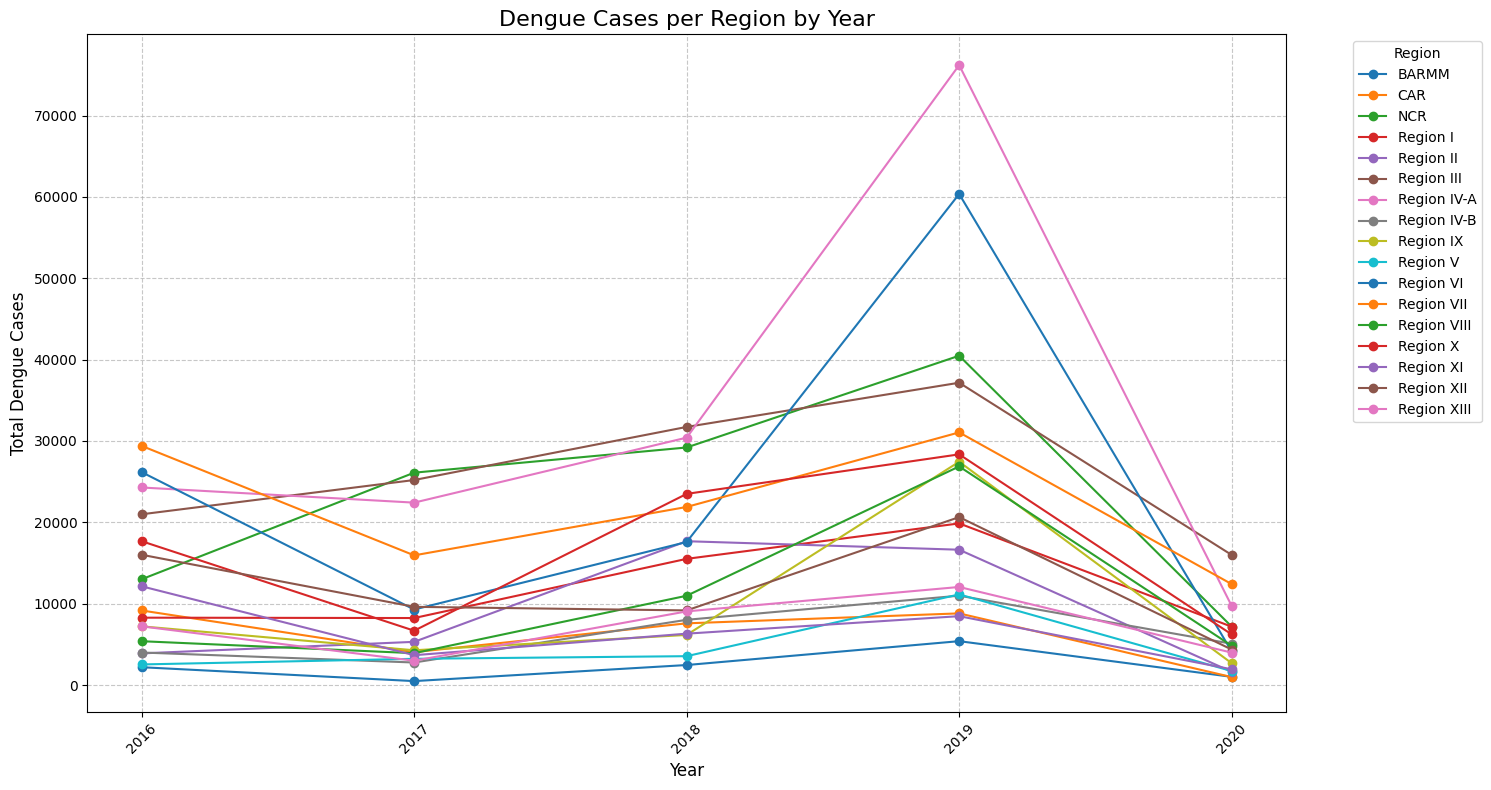

In [4]:
region_cases = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
region_cases.plot(kind='line', marker='o', figsize=(15, 8))

plt.title('Dengue Cases per Region by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Dengue Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(region_cases.index, rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h2> Insight 1)</h2>
<h4> Base on the data, 2019 had the highest amount of dengue cases overall, mainly on region IV-A CALABRZON, and base on the PSA records in 2019 there are 77,034 cases with 429 deaths. Making it the highest in the Philippines overall. Then the sudden drop of cases which might be the result of the covid pandemic during 2020 with people being at home</h4>
<P> " The dengue outbreak in the Philippines is the worst in a decade, with 350,000 illnesses and 1,342 fatalities. As of November 2019, the nation had reported approximately 371,500 cases, and 16 provinces had 
    0 declared states of calamity. " (Philippines: Dengue Outbreak - Jul 2019, 2023)</P>

<h1> Question 2) What is the Mortality rate over the year in the Region of 4-A</h1>

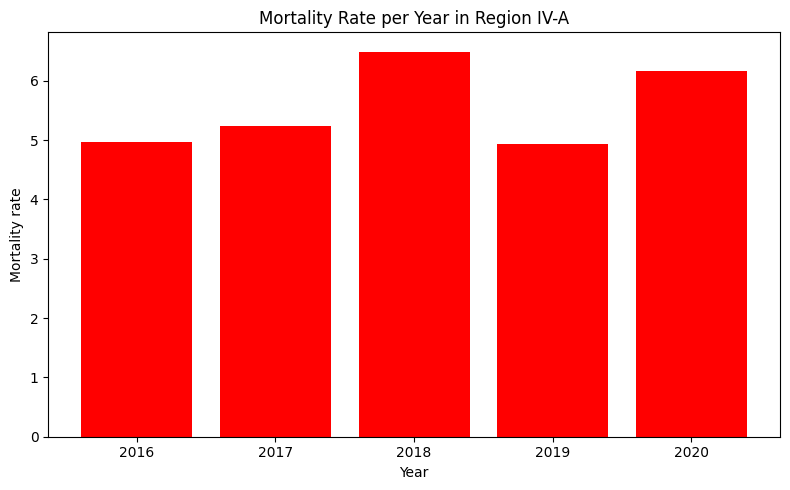

In [5]:
#Filter data first para ma separate at maging specific yung data
mortality = dengue[dengue['Region'] == 'Region IV-A']

#After filtering, we must group them into thisss python execute function from left to right, so group by year
mortality_year = mortality.groupby('Year')['Mortality_Rate'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(mortality_year['Year'], mortality_year['Mortality_Rate'], color='red')
plt.title('Mortality Rate per Year in Region IV-A')
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insights 2) </h2>
<h4> Base on the data above 2018 had the highest amount of mortality rate in CALABARZON, after some research studies examined that dengue trends in Region IV-A, Philippines (2012–2018), revealing a significant link between climatic factors and dengue incidence based on data from DOH and PAGASA-DOST. This is also due to the fact that CALABARZON is a highly populated area, some are even near bodies of water</h4>
<hr>
<h2> Insights 3) </h2>
<h4> In 2019, even though there were many more cases (so a huge outbreak), health systems may have improved in diagnosis, treatment, hospital capacity, or patient awareness, reducing the proportion of fatal cases. Even though 2019 had the highest cases of dengue, 2018 still had the highest death to cases ratio in CALABARZON.</h4>
<h4> The surge in dengue cases in 2019 may be partly linked to decreased public confidence in vaccination following the Dengvaxia controversy, which led to reduced participation in immunization programs. However, despite the rise in cases, improvements in medical response, disease management, and public awareness likely contributed to a lower case fatality rate compared to 2018.  </h4>


<h1> Question 3) How are the number of dengue cases, deaths, and mortality rate correlated over time?</h1>

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Year'),
  Text(1.5, 0, 'Dengue_Cases'),
  Text(2.5, 0, 'Dengue_Deaths'),
  Text(3.5, 0, 'Mortality_Rate')])

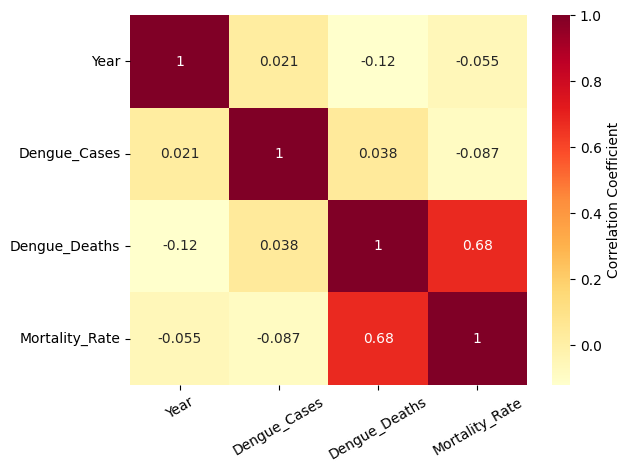

In [6]:
correlation = dengue.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='YlOrRd',cbar_kws={'label': 'Correlation Coefficient'})
plt.xticks(rotation=30)


<h2> Insight 4)</h2>
<h4> Base on the data above, the analysis suggests that while dengue cases fluctuate unpredictably, reducing deaths through healthcare interventions has been the most effective factor in lowering the mortality rate over the years this suggests that our health system has been doing better at lowering the mortality of dengue virus</h4>

<h1> Question 4) Are there specific months where dengue consistently peaks? </h1>

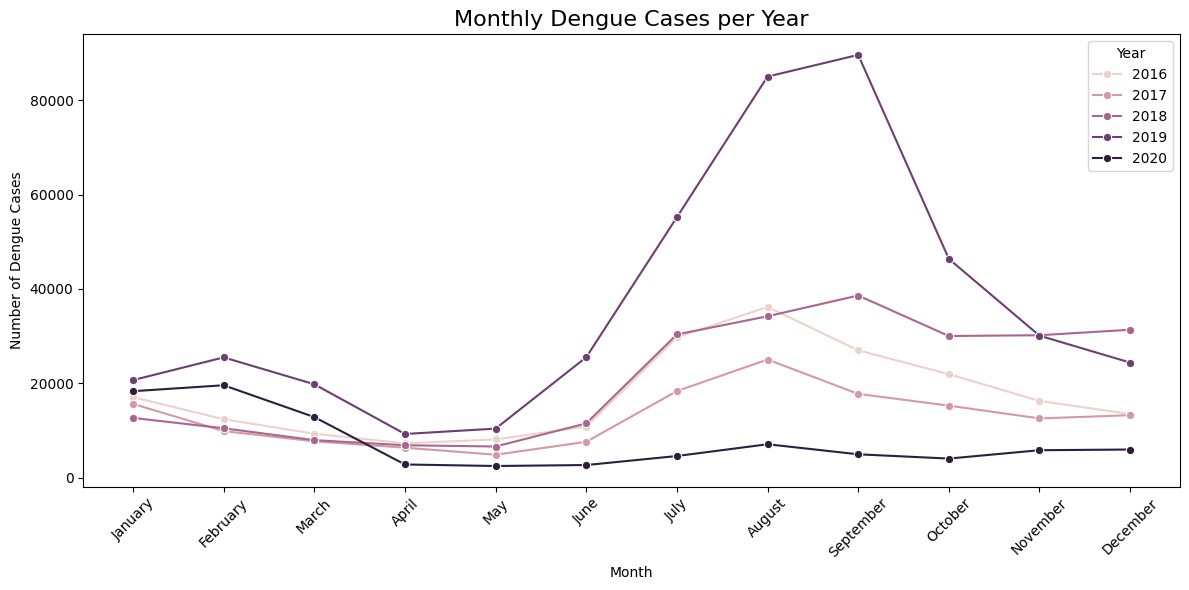

In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
peak_month = dengue.groupby(['Month', 'Year'])['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=peak_month, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title('Monthly Dengue Cases per Year', fontsize=16)
plt.ylabel('Number of Dengue Cases')
plt.xlabel('Month')
plt.xticks(range(0,12), month_order)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2> Insight 5) </h2>
<h4> Base on the data the Philippines in 2019 had the highest number of dengue cases among the years in some reports with over 115,000 reported cases an 85% increase from 2018 and 491 deaths, mostly among childrens aged 5 to 9. As the rainy season begun.</h4><p> concerns grew over a potential worsening epidemic. In response, the Philippine Red Cross supported government efforts through community awareness campaigns, clean-up drives to eliminate mosquito breeding sites, and assistance to overcrowded hospitals.</p>
<hr>
<h2> Insight 6) </h2>
<h4> The gradual increase of dengue cases during the month of May to November was due to rainy season creating more mosquitos which resulted in the quick spread of dengue virus. Dengue cases rise from May to November because the rainy season creates the perfect conditions for mosquitoes to breed. The constant rain, warm weather, and humidity help them multiply faster, leading to more infections. This shows that the increase in cases is mainly caused by the weather and season</h4>

<h1> Question 5) Which region has the highest average mortality rate?</h1>

<img src="https://www.philatlas.com/images/regions-light.png">

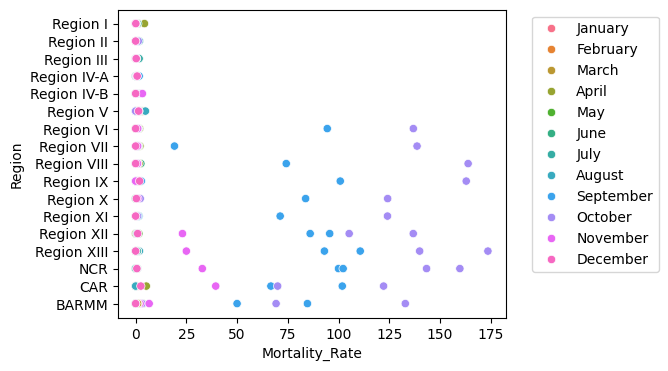

In [8]:
sns.scatterplot(data=dengue, x="Mortality_Rate", y="Region", hue="Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(5,4)
plt.show()

<h2> Insight 7)</h2>
<h4> The number of deaths per cases per region in its lowest are on the start and end of the year, from November to May this was due to the middle of the month being the rainy season for the Philippines, being near the pacific ocean which then becomes the breeding season for mosquitos and the dengue virus, that's why it is highest in every year. And the busiest months for health services</h4>
<hr>
<h2>Insight 8)</h2>
<h4>The regions with the lowest dengue mortality rates, such as Regions I, III, IV-A, IV-B, and V, benefit from better access to healthcare facilities, stronger government health programs, and higher public awareness. Their proximity to urban centers allows for faster medical response and effective dengue control measures, which help reduce severe cases and deaths even during peak rainy months.</h4>


<h1> Question 6) Which Region Had the highest Dengue Deaths Per Month</h1>

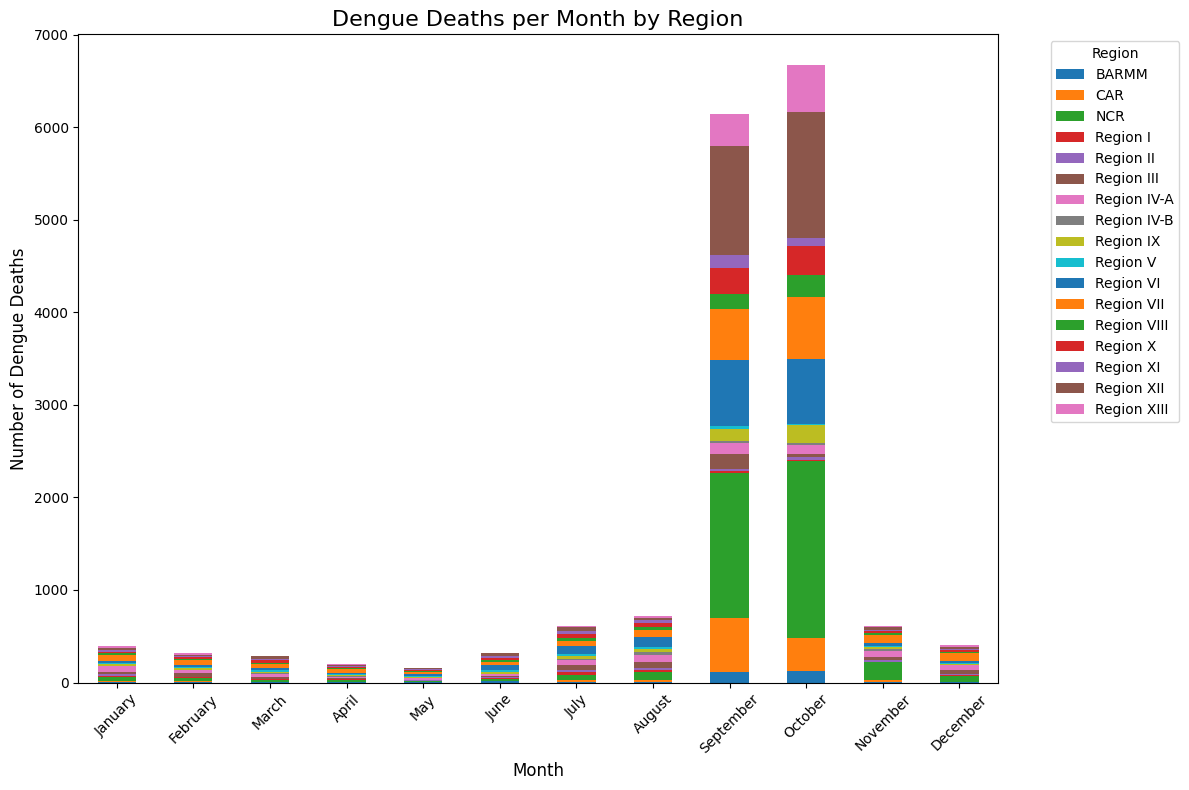

In [9]:
monthly_cases = dengue.groupby(["Month", "Region"])["Dengue_Deaths"].sum()
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.title('Dengue Deaths per Month by Region', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Dengue Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h2>Insight 9)</h2>
<h4>This shows the total number of dengue-related deaths from 2016 to 2020, with the National Capital Region (NCR) recording the highest, followed by Region XII. The high mortality in NCR can be linked to its dense population, which increases transmission risk, along with the strain on healthcare systems during major outbreaks, leading to delayed treatment and higher fatality rates.</h4>
<h4> The most significant deaths Happening in the month of September and October making this the deadliest month and most dengue prone month just in the middle of the rainy season as established </h4>


<h1> Question 7) What is the average mortality rate across all regions per year?</h1>

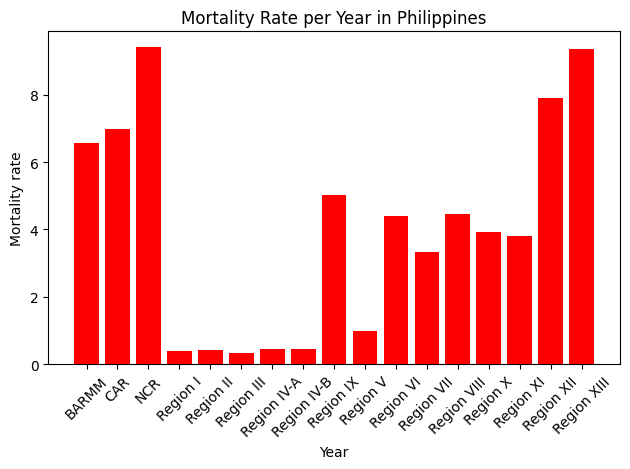

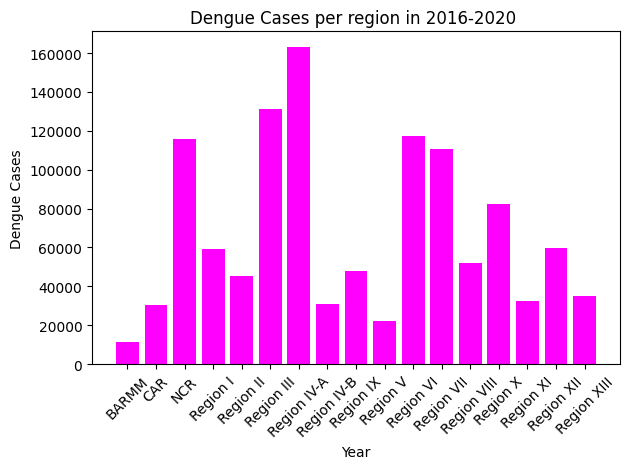

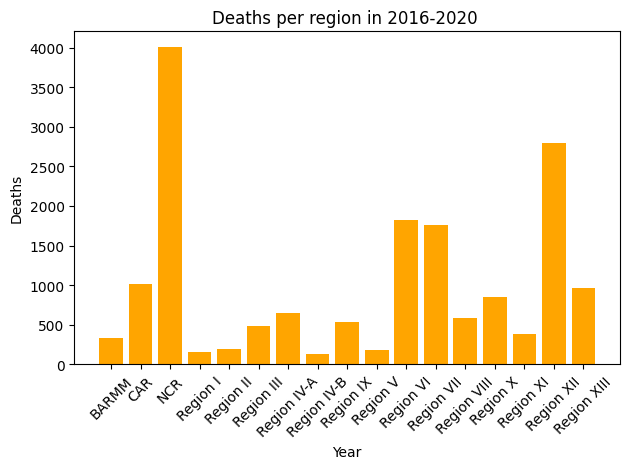

In [17]:
mortality_year = dengue.groupby('Region')['Mortality_Rate'].mean().reset_index()
cases_yearly = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()
death_yearly = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()

plt.bar(mortality_year['Region'], mortality_year['Mortality_Rate'], color='red')
plt.title('Mortality Rate per Year in Philippines')
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.bar(cases_yearly['Region'], cases_yearly['Dengue_Cases'], color='magenta')
plt.title('Dengue Cases per region in 2016-2020 ')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.bar(death_yearly['Region'], death_yearly['Dengue_Deaths'], color='orange')
plt.title('Deaths per region in 2016-2020 ')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Insight 10)</h2>
<h4>Dengue peaks from June to February as stagnant water becomes mosquito breeding sites. Regions IV-A, III, and VI are most affected due to dense populations and favorable weather. Cleaning water sources is essential, and outbreaks often surge every 4–5 years influenced by weather patterns..</h4>
<hr>

<h2>Insight 11)</h2>
<h4>From 2016 to 2020, NCR had the highest dengue deaths, followed by Region XII. Although IV-A and III reported more cases, NCR’s higher fatalities reflect severe infections, hospital congestion, and limited healthcare capacity. </h4>
<hr>

<h2>Insight 12)</h2>
<h4>Dengue in the Philippines is fueled by urbanization, poor sanitation, climate change, travel, and socioeconomic disparities. Between 2008–2012, there were ~117,000 annual cases, mostly severe (DHF/DSS) with DENV-3 predominant. Regional differences in healthcare affect mortality, highlighting the need for vector control, community engagement, healthcare improvement, and climate-adaptive urban planning.</h4>
<hr>

<h2>Overall Relationship:</h2>
<h4>Dengue impact is shaped by both environmental and systemic factors. The rainy season increases mosquito populations, while healthcare capacity influences outcomes. Regions with many cases but lower mortality (IV-A, III) show better preparedness, whereas NCR and CAR face higher fatalities despite fewer cases, emphasizing the need for stronger health systems and sustained vector control.</h4>
